In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import urllib

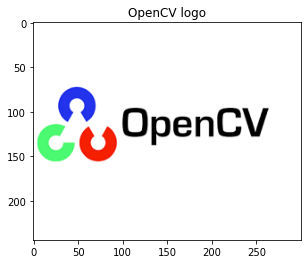

In [2]:
req = urllib.request.urlopen('https://i0.wp.com/securityaffairs.co/wordpress/wp-content/uploads/2020/01/openCV.png?resize=300%2C244&ssl=1')
arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
image = cv2.imdecode(arr, -1) # 'Load it as it is'
plt.imshow(image)
plt.title('OpenCV logo')
plt.show()

#### **Splitting & Merging the image Channels**
___

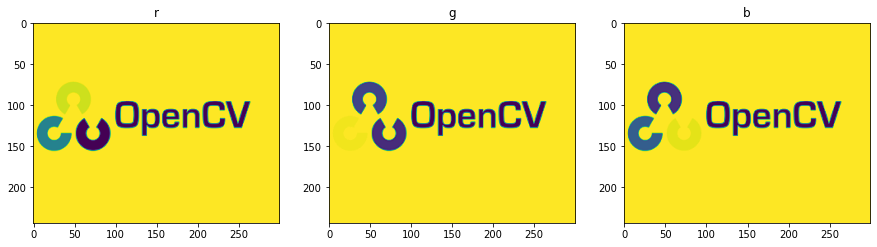

In [3]:
b = image[:,:,0] # getting the blue channel
g = image[:,:,1]
r = image[:,:,2]
plt.figure(figsize=(15,20))
plt.subplot(1,3,1)
plt.title('r')
plt.imshow(r)
plt.subplot(1,3,2)
plt.title('g')
plt.imshow(g)
plt.subplot(1,3,3)
plt.title('b')
plt.imshow(b)

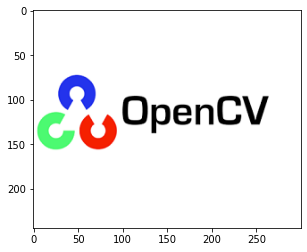

In [4]:
image_copy = cv2.merge((b,g,r))
plt.imshow(image_copy)

#### **Geometric Transformation of images**
___

In [5]:
height,width=image.shape[:2]

In [6]:
#increase the image by the factor of two
resized_image=cv2.resize(image, (width*2, height*2), interpolation=cv2.INTER_LINEAR)
# shrink the image by the factor of two
dst_image=cv2.resize(image, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_AREA)

# best approach
resized_image2=cv2.resize(image, (width*2, height*2), interpolation=cv2.INTER_CUBIC)

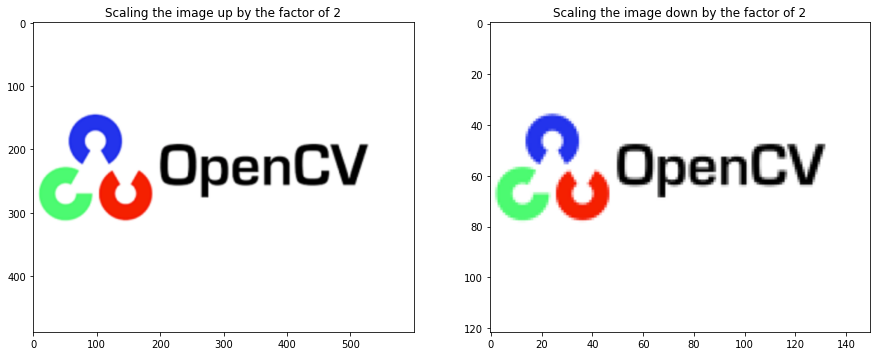

In [7]:
plt.figure(figsize=(15,20))
plt.subplot(1,2,1)
plt.title('Scaling the image up by the factor of 2')
plt.imshow(resized_image)
plt.subplot(1,2,2)
plt.title('Scaling the image down by the factor of 2')
plt.imshow(dst_image)
plt.show()

#### **Translating an image**
___

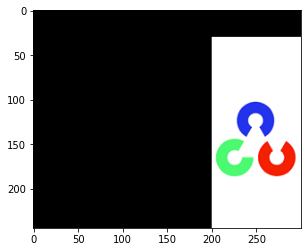

In [8]:
M = np.float32([[1,0,200], [0,1, 30]]) # 200 pixels in the x direction and 30 pixels in the y direction
dst_image = cv2.warpAffine(image, M, (width, height))
plt.imshow(dst_image)
plt.show()

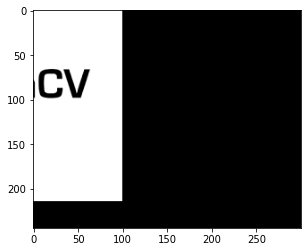

In [9]:
M = np.float32([[1,0,-200], [0,1, -30]]) # 200 pixels in the x direction and 30 pixels in the y direction
dst_image = cv2.warpAffine(image, M, (width, height))
plt.imshow(dst_image)
plt.show()

#### **Rotating an image**
___

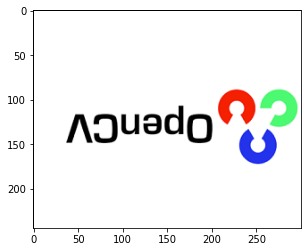

In [10]:
M = cv2.getRotationMatrix2D((width/2.0,height/2.0), 180, 1) # the rotation occurrs anti-clockwise
dst_image = cv2.warpAffine(image, M, (width, height))
plt.imshow(dst_image)
plt.show()

#### **Affine Transformation on an image**
___

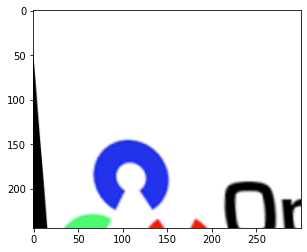

In [11]:
pts_1 = np.float32([[135,45], [385,45], [135, 230]])
pts_2 = np.float32([[135,45], [385,45], [150,230]])
M = cv2.getAffineTransform(pts_1, pts_2)
dst_image = cv2.warpAffine(resized_image, M, (width, height))
plt.imshow(dst_image)
plt.show()

#### **Perspective Transformation of an image**
___

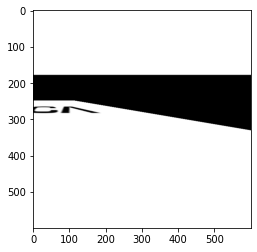

In [12]:
pts_1 = np.float32([[450, 65], [417, 65], [431, 164], [552, 164]])
pts_2 = np.float32([[0, 0], [300, 0], [0, 300], [300, 300]])
M = cv2.getPerspectiveTransform(pts_1, pts_2)
dst_image = cv2.warpPerspective(resized_image, M, (600, 600))
plt.imshow(dst_image)
plt.show()

#### **Cropping an Image**
___

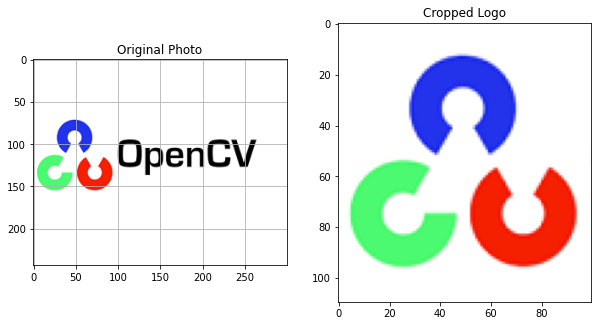

In [13]:
plt.figure(figsize=(10,20))
plt.subplot(1,2,1)
plt.title('Original Photo')
plt.imshow(image)
plt.grid()
plt.subplot(1,2,2)
dst_image= image[60:170, 0:100]
plt.title('Cropped Logo')
plt.imshow(dst_image)
plt.show()

#### **Image Filtering**
___

##### **Applying Arbitrary Kernels**
___

In [14]:
kernel_averaging_5_5 = np.array([[0.04, 0.04, 0.04, 0.04, 0.04], [0.04, 0.04, 0.04, 0.04, 0.04], [0.04, 0.04, 0.04, 0.04, 0.04],[0.04, 0.04, 0.04, 0.04, 0.04], [0.04, 0.04, 0.04, 0.04, 0.04]])
kernel_averaging_5_5

array([[0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04]])

In [15]:
kernel_averaging_5_5 = np.ones((5, 5), np.float32) / 25
kernel_averaging_5_5

array([[0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04]], dtype=float32)

In [16]:
smooth_image_f2D = cv2.filter2D(image, -1, kernel_averaging_5_5)
blur=cv2.blur(image,(10,10))
gaussian_blur=cv2.GaussianBlur(image,(5,5),cv2.BORDER_DEFAULT)
box_filter=cv2.boxFilter(image, -1, (50,50))
median_blur=cv2.medianBlur(image,5)
bilateral_filter=cv2.bilateralFilter(image, 15, 75, 75)

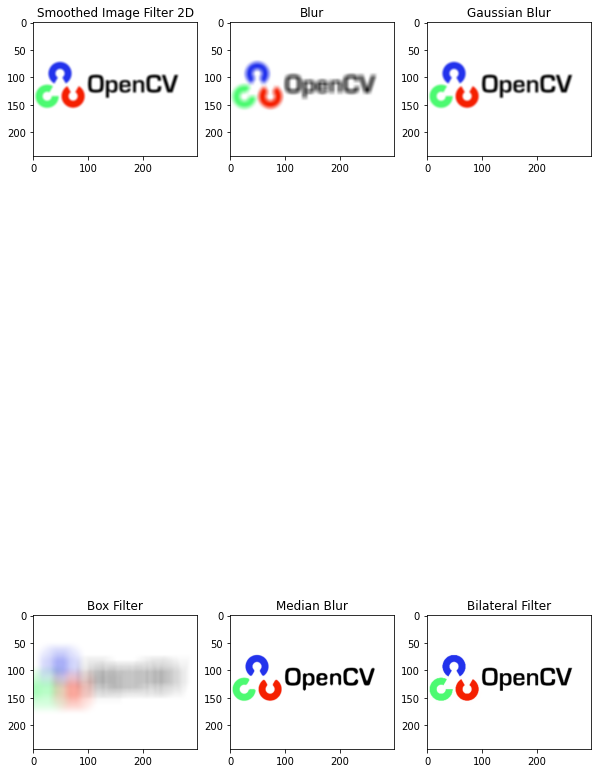

In [17]:
plt.figure(figsize=(10,20))
plt.subplot(2,3,1)
plt.imshow(smooth_image_f2D)
plt.title('Smoothed Image Filter 2D')
plt.subplot(2,3,2)
plt.title('Blur')
plt.imshow(blur)
plt.subplot(2,3,3)
plt.title('Gaussian Blur')
plt.imshow(gaussian_blur)
plt.subplot(2,3,4)
plt.imshow(box_filter)
plt.title('Box Filter')
plt.subplot(2,3,5)
plt.imshow(median_blur)
plt.title('Median Blur')
plt.subplot(2,3,6)
plt.imshow(bilateral_filter)
plt.title('Bilateral Filter')
plt.show()

#### **Creating Pencil Sketch image**
___

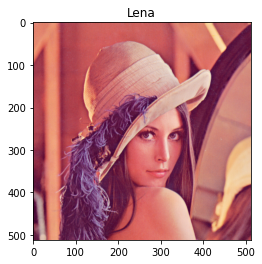

In [18]:
req = urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png')
arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
image = cv2.imdecode(arr, -1) # 'Load it as it is'
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
plt.title('Lena')
plt.show()

In [19]:
gray,color=cv2.pencilSketch(image,sigma_s=60, sigma_r=0.07, shade_factor=0.05)

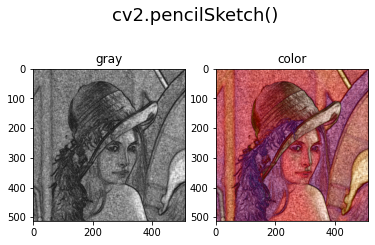

In [20]:
plt.suptitle('cv2.pencilSketch()',fontsize=18)
plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(gray,cv2.COLOR_BGR2RGB))
plt.title('gray')
plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(color,cv2.COLOR_BGR2RGB))
plt.title('color') 
plt.show()

#### **Stylization**
___


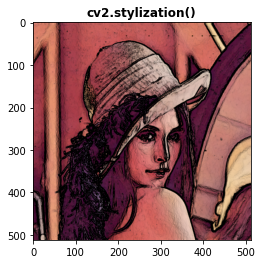

In [21]:
stl = cv2.stylization(image, sigma_s=60, sigma_r=0.07)
plt.imshow(cv2.cvtColor(stl,cv2.COLOR_BGR2RGB))
plt.title('cv2.stylization()',fontweight='bold')
plt.show()

#### **Detail Enhancement**
___


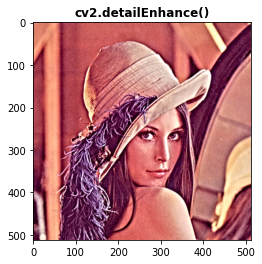

In [22]:
dtl = cv2.detailEnhance(image, sigma_s=10, sigma_r=0.15)
plt.imshow(cv2.cvtColor(dtl,cv2.COLOR_BGR2RGB))
plt.title('cv2.detailEnhance()',fontweight='bold')
plt.show()

### **Arithmetic with images**
___


In [23]:
x = np.uint8([250])
y = np.uint8([50])
result_opencv = cv2.add(x,y)
print(f'cv2.add(x:{x}, y:{y} = {result_opencv}')

cv2.add(x:[250], y:[50] = [[255]]


#### **Image addition and subtraction**
____

adding 60 to all the images.
* First we create a matrix of ones of the similar shape of the image and then after that we multiply it with 60.
* Then we use `cv2.add()` to add 60 to all the pixels of the image.

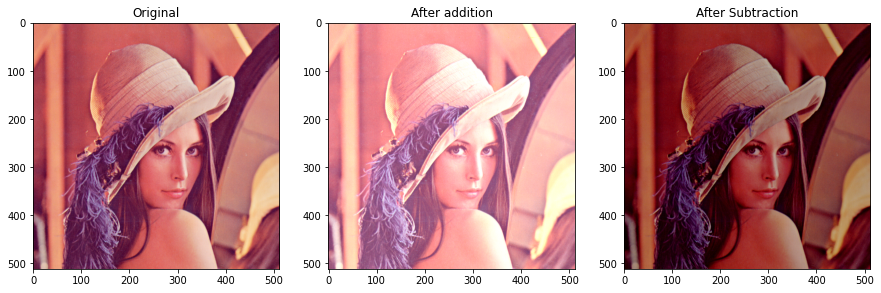

In [24]:
M = np.ones(image.shape, dtype = 'uint8')*60
added_image = cv2.add(image, M)
subbed_image = cv2.subtract(image, M)
plt.figure(figsize=(15,10))
# plt.suptitle('Image addition and subtraction')
plt.subplot(1,3,1)
plt.title('Original')
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
plt.subplot(1,3,2)
plt.title('After addition')
plt.imshow(cv2.cvtColor(added_image,cv2.COLOR_BGR2RGB))
plt.subplot(1,3,3)
plt.title('After Subtraction')
plt.imshow(cv2.cvtColor(subbed_image,cv2.COLOR_BGR2RGB))
plt.show()

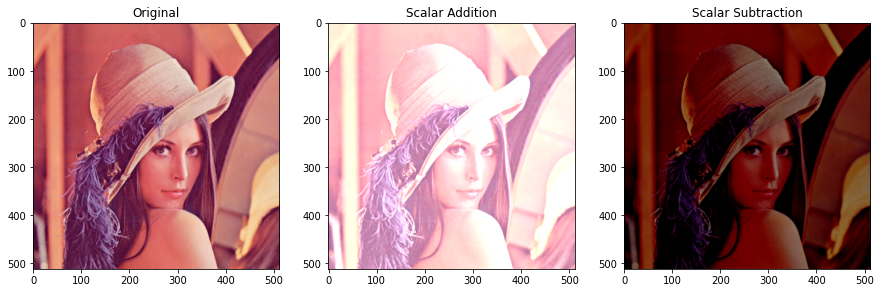

In [25]:
scalar = np.ones((1,3), dtype='float')*110
added_image_2 = cv2.add(image, scalar)
subbed_image_2 = cv2.subtract(image, scalar)
plt.figure(figsize=(15,10))
# plt.suptitle('Image addition and subtraction')
plt.subplot(1,3,1)
plt.title('Original')
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
plt.subplot(1,3,2)
plt.title('Scalar Addition')
plt.imshow(cv2.cvtColor(added_image_2, cv2.COLOR_BGR2RGB))
plt.subplot(1,3,3)
plt.title('Scalar Subtraction')
plt.imshow(cv2.cvtColor(subbed_image_2, cv2.COLOR_BGR2RGB))
plt.show()

### **Image Blending**
___

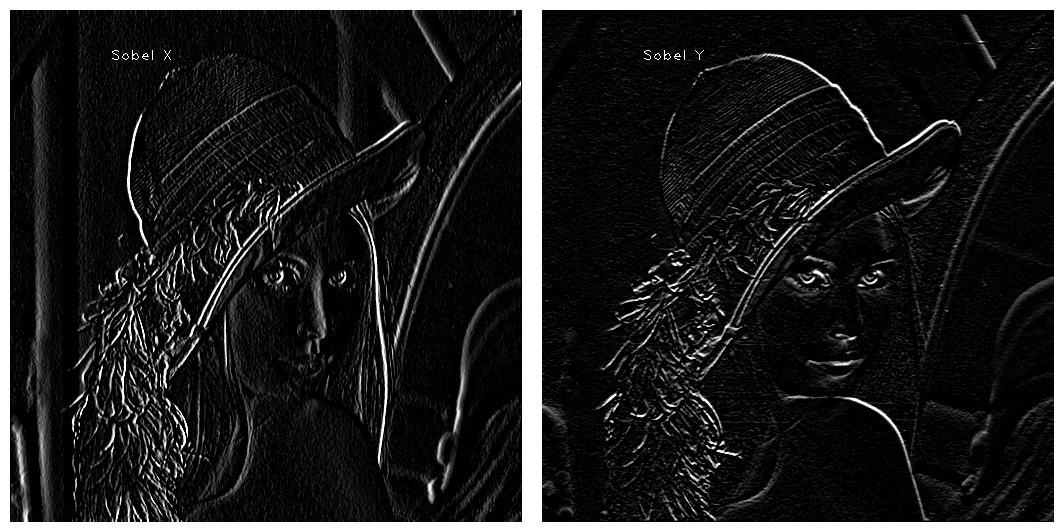

In [26]:
from google.colab.patches import cv2_imshow
gray_image= cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
gradient_x = cv2.Sobel(gray_image, cv2.CV_16S, 1, 0, 3) 
gradient_x = cv2.putText(gradient_x, 'Sobel X',(100,50),1,1,(255,255,255))
gradient_x= cv2.copyMakeBorder(gradient_x,10,10,10,10,cv2.BORDER_CONSTANT,value=[255,255,255])
gradient_y = cv2.Sobel(gray_image, cv2.CV_16S, 0, 1, 3)
gradient_y = cv2.putText(gradient_y, 'Sobel Y',(100,50),1,1,(255,255,255))
gradient_y = cv2.copyMakeBorder(gradient_y,10,10,10,10,cv2.BORDER_CONSTANT,value=[255,255,255])
final_image = cv2.hconcat((gradient_x,gradient_y))
cv2_imshow(final_image)

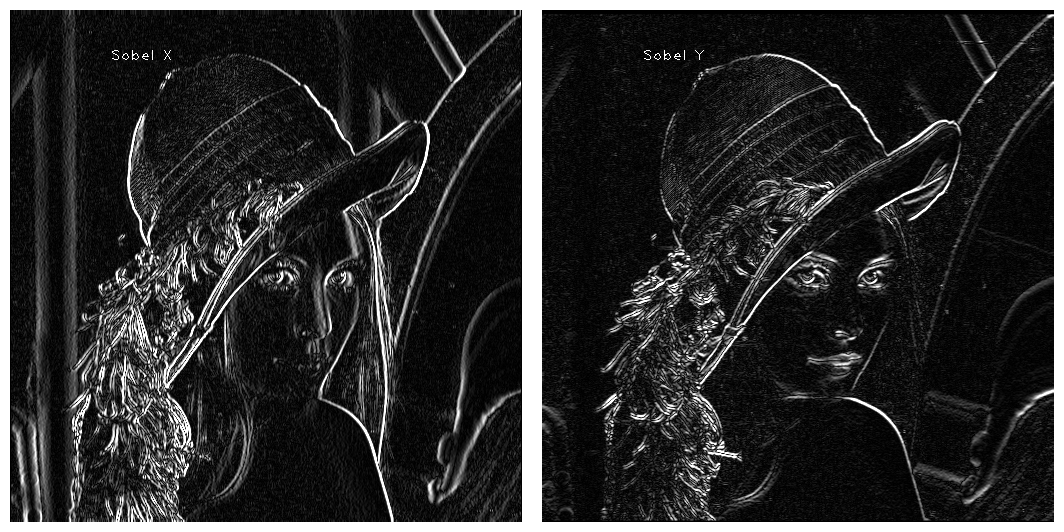

In [27]:
abs_gradient_x = cv2.convertScaleAbs(gradient_x)
abs_gradient_y = cv2.convertScaleAbs(gradient_y)
final_abs = cv2.hconcat((abs_gradient_x, abs_gradient_y))
cv2_imshow(final_abs)

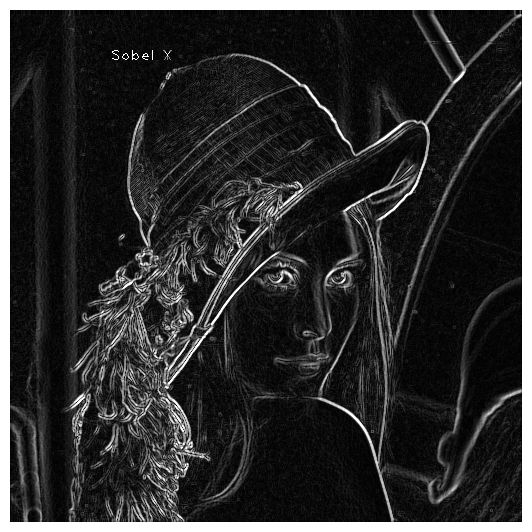

In [28]:
sobel_image = cv2.addWeighted(abs_gradient_x, 0.5, abs_gradient_y, 0.5, 0)
cv2_imshow(sobel_image)

### **Bitwise Operations**
___

Bitwise_and


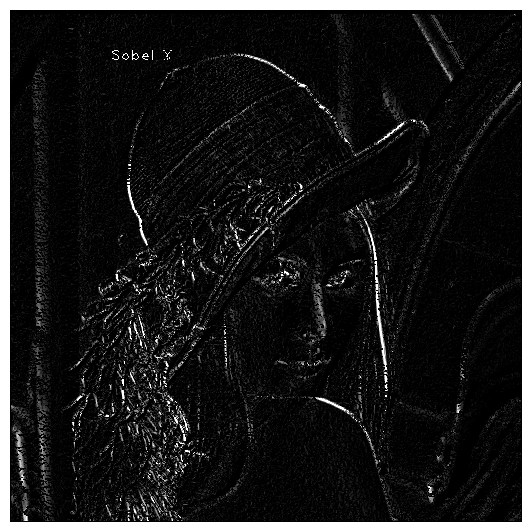

bitwise_not_x


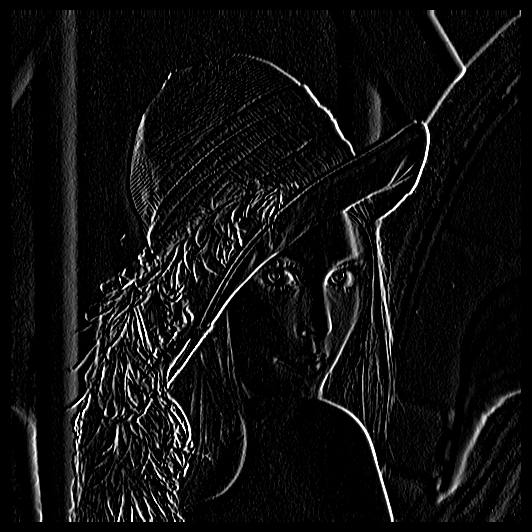

bitwise_not_y


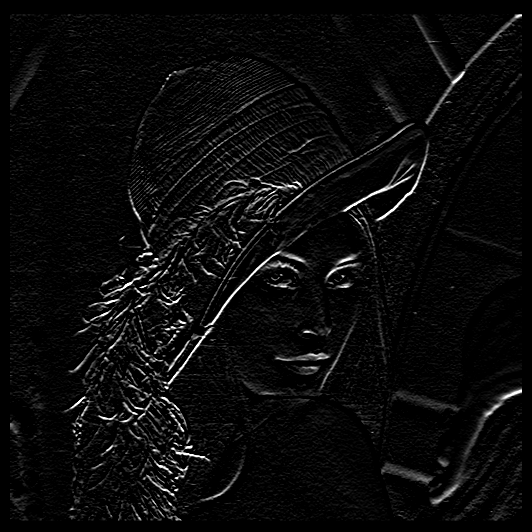

bitwise_or


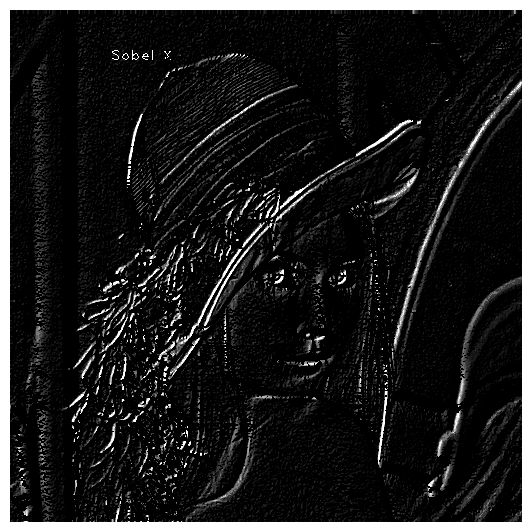

In [29]:
bitwise_and = cv2.bitwise_and(gradient_x, gradient_y)
bitwise_not_x = cv2.bitwise_not(gradient_x)
bitwise_not_y = cv2.bitwise_not(gradient_y)
bitwise_or = cv2.bitwise_or(gradient_x, gradient_y) 

print('Bitwise_and')
cv2_imshow(bitwise_and)
print('bitwise_not_x')
cv2_imshow(bitwise_not_x)
print('bitwise_not_y')
cv2_imshow(bitwise_not_y)
print('bitwise_or')
cv2_imshow(bitwise_or)

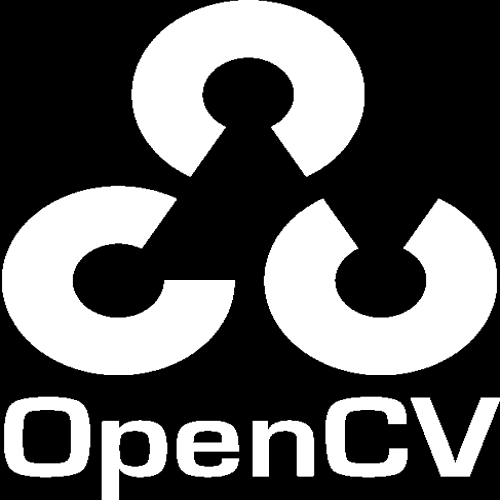

In [30]:
req = urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/thumb/3/32/OpenCV_Logo_with_text_svg_version.svg/487px-OpenCV_Logo_with_text_svg_version.svg.png?20130608172504')
arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
opncv_logo = cv2.imdecode(arr, -1) # 'Load it as it is'
gray = cv2.cvtColor(opncv_logo,cv2.COLOR_BGR2GRAY)
binary_image = cv2.threshold(gray , 0, 255, cv2.THRESH_BINARY)[1]
binary_image = cv2.resize(binary_image, (500,500), interpolation = cv2.INTER_AREA)
binary_image = cv2.cvtColor(binary_image, cv2.COLOR_BGR2RGB)
image = cv2.resize(image, (500,500), interpolation = cv2.INTER_AREA)
cv2_imshow(binary_image)

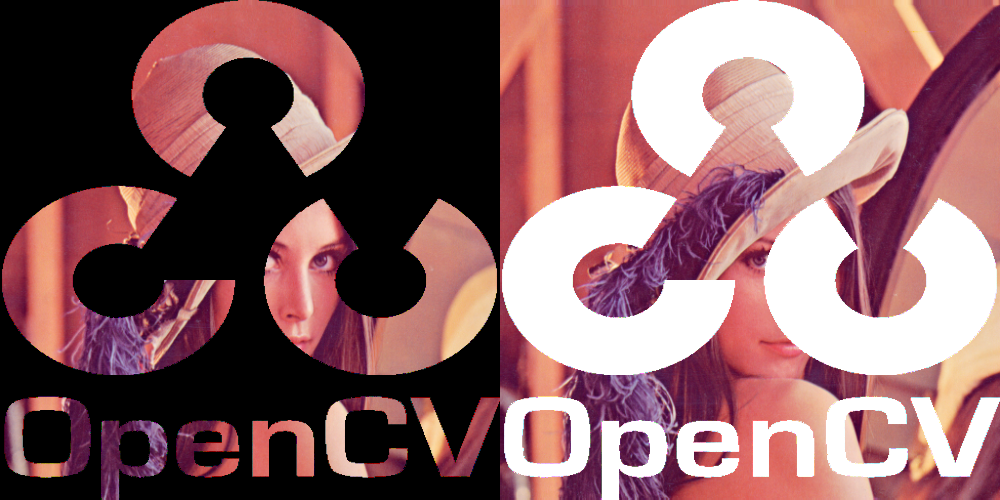

In [31]:
bitwise_and = cv2.bitwise_and(image, binary_image)
bitwise_or = cv2.bitwise_or(image, binary_image)

final_bit = cv2.hconcat((bitwise_and,bitwise_or))
cv2_imshow(final_bit)

### **Morphological Transformations**
___

Transformation performed on binary image, based on shape.

* orignal image

 <p align='center'><img src='https://docs.opencv.org/4.x/j.png'></p>

* dilation `cv2.dilate()`

<p align='center'><img src='https://docs.opencv.org/4.x/erosion.png'></p>

* erosion `cv2.erode()`

<p align='center'><img src='https://docs.opencv.org/4.x/dilation.png'></p>

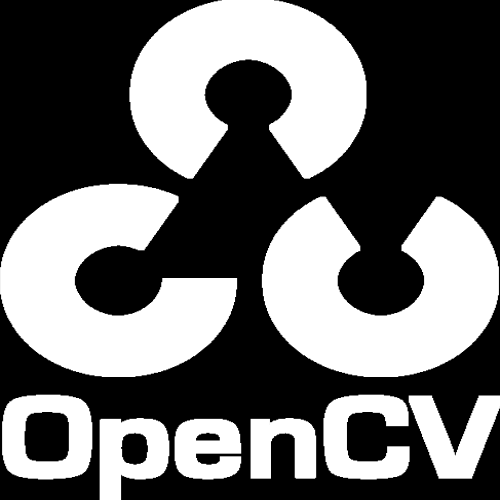

In [32]:
kernel=np.ones((5,5),np.uint8)
dilation = cv2.dilate(binary_image, kernel, iterations=1)
cv2_imshow(dilation)

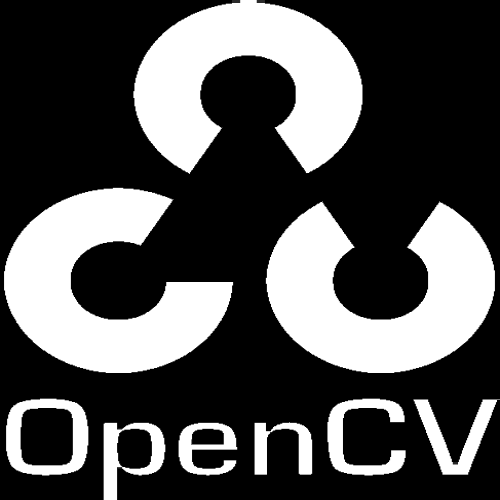

In [33]:
erosion = cv2.erode(binary_image, kernel, iterations=1)
cv2_imshow(erosion)

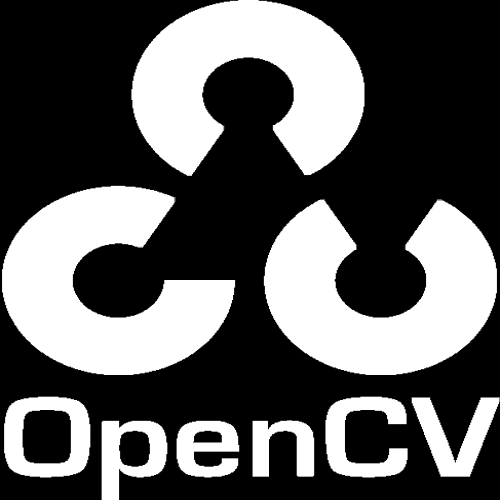

In [34]:
opening = cv2.morphologyEx(binary_image, cv2.MORPH_OPEN, kernel)
cv2_imshow(opening)

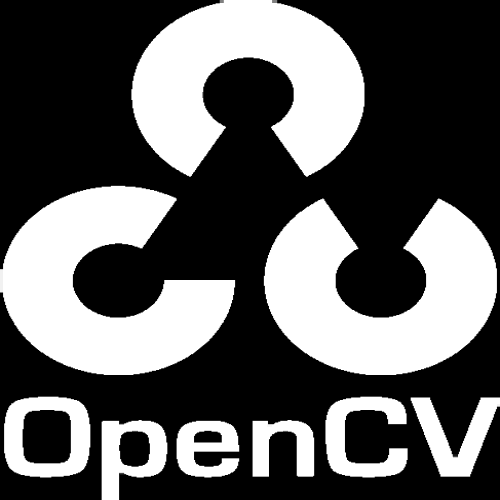

In [35]:
closing = cv2.morphologyEx(binary_image, cv2.MORPH_CLOSE, kernel)
cv2_imshow(closing)

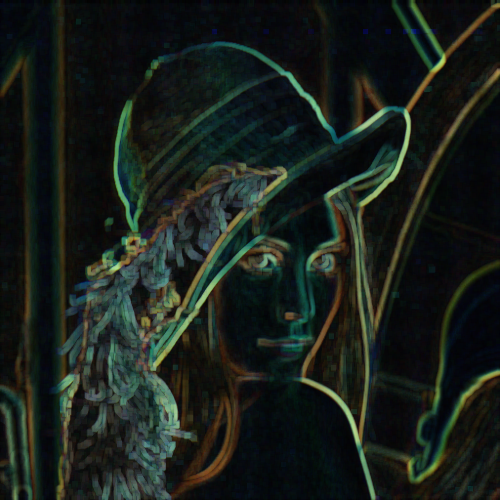

In [36]:
morph_gradient = cv2.morphologyEx(image, cv2.MORPH_GRADIENT, kernel)
cv2_imshow(morph_gradient)

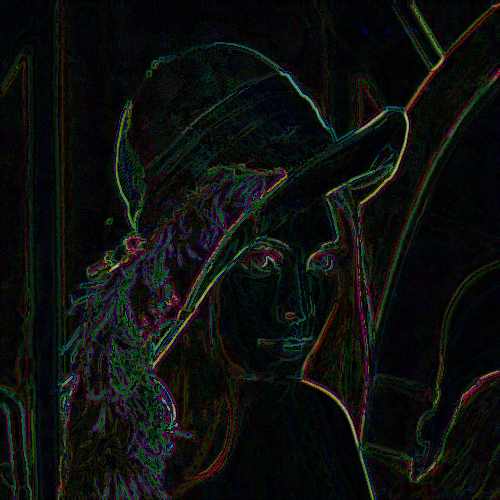

In [37]:
bitwise_andII = cv2.bitwise_and(image, morph_gradient)
cv2_imshow(bitwise_andII)

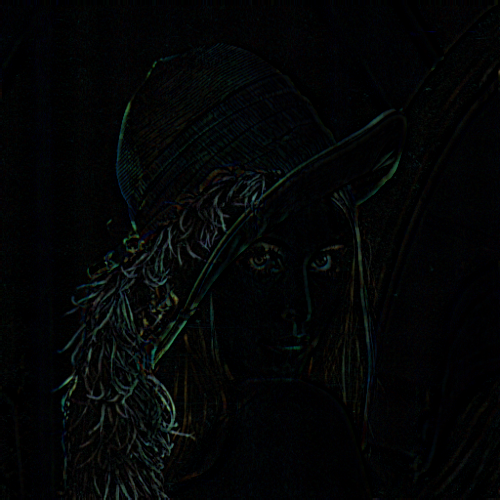

In [38]:
top_hat = cv2.morphologyEx(image, cv2.MORPH_TOPHAT, kernel)
cv2_imshow(top_hat)

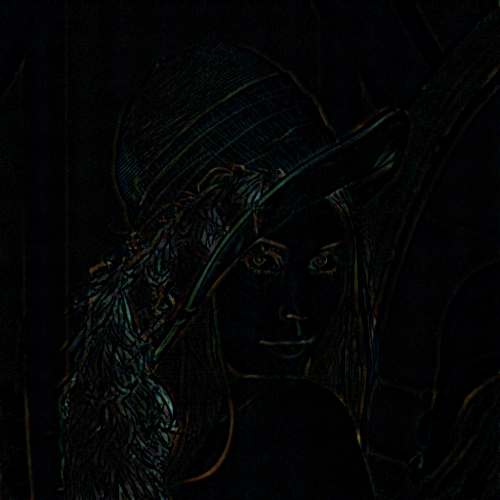

In [39]:
black_hat = cv2.morphologyEx(image, cv2.MORPH_BLACKHAT, kernel)
cv2_imshow(black_hat)

### **Color Spaces** 
___

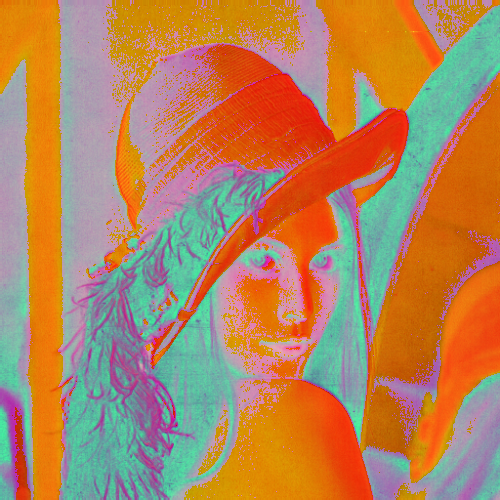

In [40]:
hsvimage = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
cv2_imshow(hsvimage)

### **Color Maps**
___

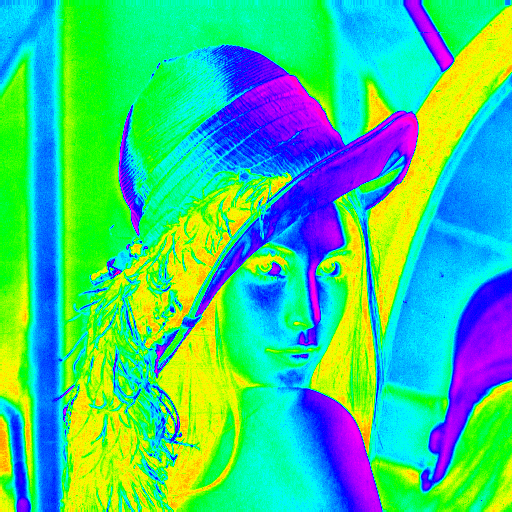

In [41]:
img_colormap_hsv = cv2.applyColorMap(gray_image, cv2.COLORMAP_HSV)
cv2_imshow(img_colormap_hsv)

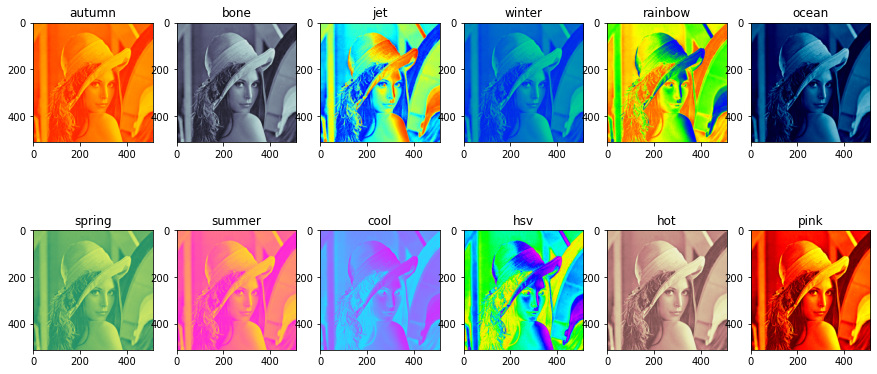

In [62]:
NAMES=['autumn', 'bone','jet', 'winter','rainbow', 'ocean', 'spring','summer', 'cool', 'hsv', 'hot', 'pink', 'parula']
fig=1
plt.figure(figsize=(15,7))
for i in range(13):
  if fig>=13:
    break
  plt.subplot(2,6,fig)
  plt.title(NAMES[i])
  plt.imshow(cv2.cvtColor(cv2.applyColorMap(gray_image, i),cv2.COLOR_BGR2RGB))  
  fig+=1

### **Custom color maps**
___

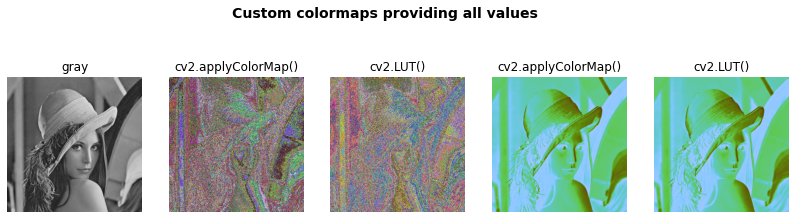

In [95]:

def apply_custom_colormap_values(im_gray):
    """Applies a custom color map using cv2.applyColorMap()"""

    # Create the LUT:
    lut = np.zeros((256, 1, 3), dtype=np.uint8)
    lut[:, 0, 0] = [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
                    255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
                    255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
                    255, 255, 255, 255, 255, 253, 251, 249, 247, 245, 242, 241, 238, 237, 235, 233, 231, 229, 227, 225,
                    223, 221, 219, 217, 215, 213, 211, 209, 207, 205, 203, 201, 199, 197, 195, 193, 191, 189, 187, 185,
                    183, 181, 179, 177, 175, 173, 171, 169, 167, 165, 163, 161, 159, 157, 155, 153, 151, 149, 147, 145,
                    143, 141, 138, 136, 134, 132, 131, 129, 126, 125, 122, 121, 118, 116, 115, 113, 111, 109, 107, 105,
                    102, 100, 98, 97, 94, 93, 91, 89, 87, 84, 83, 81, 79, 77, 75, 73, 70, 68, 66, 64, 63, 61, 59, 57,
                    54, 52, 51, 49, 47, 44, 42, 40, 39, 37, 34, 33, 31, 29, 27, 25, 22, 20, 18, 17, 14, 13, 11, 9, 6, 4,
                    2, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
                    10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
                    10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]

    lut[:, 0, 1] = [200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200,
                    200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200,
                    200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200,
                    200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200,
                    200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200,
                    200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200,
                    200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200,
                    200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 198, 196, 194, 192,
                    190, 188, 186, 184, 182, 180, 178, 176, 174, 171, 169, 167, 165, 163, 161, 159, 157, 155, 153, 151,
                    149, 147, 145, 143, 141, 139, 137, 135, 133, 131, 129, 127, 125, 123, 121, 119, 117, 115, 113, 111,
                    109, 107, 105, 103, 101, 99, 97, 95, 93, 91, 89, 87, 85, 83, 82, 80, 78, 76, 74, 72, 70, 68, 66, 64,
                    62, 60, 58, 56, 54, 52, 50, 48, 46, 44, 42, 40, 38, 36, 34, 32, 30, 28, 26, 24, 22, 20, 18, 16, 14,
                    12, 10, 8, 6, 4, 2, 0]

    lut[:, 0, 2] = [195, 194, 193, 191, 190, 189, 188, 187, 186, 185, 184, 183, 182, 181, 179, 178, 177, 176, 175, 174,
                    173, 172, 171, 170, 169, 167, 166, 165, 164, 163, 162, 161, 160, 159, 158, 157, 155, 154, 153, 152,
                    151, 150, 149, 148, 147, 146, 145, 143, 142, 141, 140, 139, 138, 137, 136, 135, 134, 133, 131, 130,
                    129, 128, 127, 126, 125, 124, 123, 122, 121, 120, 119, 118, 117, 116, 115, 114, 113, 112, 111, 110,
                    109, 108, 107, 106, 105, 104, 103, 102, 101, 95, 99, 98, 97, 96, 95, 95, 95, 95, 95, 95, 95, 95, 95,
                    95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95,
                    95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95,
                    95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95,
                    95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95,
                    95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95,
                    95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95,
                    95, 95, 95]

    # Apply color map using cv2.applyColorMap()
    im_color = cv2.applyColorMap(im_gray, lut)
    return im_color


def apply_custom_colormap_values2(im_gray):
    """Applies a custom color map using cv2.LUT()"""

    # Create the LUT:
    lut = np.zeros((256, 3), dtype=np.uint8)
    lut[:, 0] = [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
                 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
                 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
                 255, 255, 255, 255, 255, 253, 251, 249, 247, 245, 242, 241, 238, 237, 235, 233, 231, 229, 227, 225,
                 223, 221, 219, 217, 215, 213, 211, 209, 207, 205, 203, 201, 199, 197, 195, 193, 191, 189, 187, 185,
                 183, 181, 179, 177, 175, 173, 171, 169, 167, 165, 163, 161, 159, 157, 155, 153, 151, 149, 147, 145,
                 143, 141, 138, 136, 134, 132, 131, 129, 126, 125, 122, 121, 118, 116, 115, 113, 111, 109, 107, 105,
                 102, 100, 98, 97, 94, 93, 91, 89, 87, 84, 83, 81, 79, 77, 75, 73, 70, 68, 66, 64, 63, 61, 59, 57,
                 54, 52, 51, 49, 47, 44, 42, 40, 39, 37, 34, 33, 31, 29, 27, 25, 22, 20, 18, 17, 14, 13, 11, 9, 6, 4,
                 2, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
                 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
                 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]

    lut[:, 1] = [200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200,
                 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200,
                 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200,
                 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200,
                 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200,
                 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200,
                 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200,
                 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 198, 196, 194, 192,
                 190, 188, 186, 184, 182, 180, 178, 176, 174, 171, 169, 167, 165, 163, 161, 159, 157, 155, 153, 151,
                 149, 147, 145, 143, 141, 139, 137, 135, 133, 131, 129, 127, 125, 123, 121, 119, 117, 115, 113, 111,
                 109, 107, 105, 103, 101, 99, 97, 95, 93, 91, 89, 87, 85, 83, 82, 80, 78, 76, 74, 72, 70, 68, 66, 64,
                 62, 60, 58, 56, 54, 52, 50, 48, 46, 44, 42, 40, 38, 36, 34, 32, 30, 28, 26, 24, 22, 20, 18, 16, 14,
                 12, 10, 8, 6, 4, 2, 0]

    lut[:, 2] = [195, 194, 193, 191, 190, 189, 188, 187, 186, 185, 184, 183, 182, 181, 179, 178, 177, 176, 175, 174,
                 173, 172, 171, 170, 169, 167, 166, 165, 164, 163, 162, 161, 160, 159, 158, 157, 155, 154, 153, 152,
                 151, 150, 149, 148, 147, 146, 145, 143, 142, 141, 140, 139, 138, 137, 136, 135, 134, 133, 131, 130,
                 129, 128, 127, 126, 125, 124, 123, 122, 121, 120, 119, 118, 117, 116, 115, 114, 113, 112, 111, 110,
                 109, 108, 107, 106, 105, 104, 103, 102, 101, 95, 99, 98, 97, 96, 95, 95, 95, 95, 95, 95, 95, 95, 95,
                 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95,
                 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95,
                 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95,
                 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95,
                 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95,
                 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95,
                 95, 95, 95]

    # Apply color map using cv2.LUT():
    s0, s1 = im_gray.shape
    im_color = np.empty(shape=(s0, s1, 3), dtype=np.uint8)

    for i in range(3):
        im_color[..., i] = cv2.LUT(im_gray, lut[:, i])
    return im_color


def apply_rand_custom_colormap_values(im_gray):
    """Applies a random color map using cv2.applyColorMap()"""

    # Create random LUT
    lut = np.random.randint(255, size=(256, 1, 3), dtype=np.uint8)

    # Apply color map using cv2.applyColorMap()
    im_color = cv2.applyColorMap(im_gray, lut)
    return im_color


def apply_rand_custom_colormap_values2(im_gray):
    """Applies a random color map using cv2.LUT()"""

    # Create random LUT
    lut = np.random.randint(255, size=(256, 3), dtype=np.uint8)

    # Apply color map using cv2.LUT():
    s0, s1 = im_gray.shape
    im_color = np.empty(shape=(s0, s1, 3), dtype=np.uint8)
    for i in range(3):
        im_color[..., i] = cv2.LUT(im_gray, lut[:, i])
    return im_color


def show_with_matplotlib(color_img, title, pos):
    """Shows an image using matplotlib capabilities"""

    # Convert BGR image to RGB
    img_RGB = color_img[:, :, ::-1]

    ax = plt.subplot(1, 5, pos)
    plt.imshow(img_RGB)
    plt.title(title)
    plt.axis('off')


# We load the image using cv2.imread() and using 'cv2.IMREAD_GRAYSCALE' argument:
gray_img = gray_image

# create a figure() object with appropriate size and title:
plt.figure(figsize=(14, 4))
plt.suptitle("Custom colormaps providing all values", fontsize=14, fontweight='bold')

# Show image:
show_with_matplotlib(cv2.cvtColor(gray_img, cv2.COLOR_GRAY2BGR), "gray", 1)

# Apply the custom color maps to the grayscale image:
custom_rand_1 = apply_rand_custom_colormap_values(gray_img)
custom_rand_2 = apply_rand_custom_colormap_values2(gray_img)
custom_values_1 = apply_custom_colormap_values(gray_img)
custom_values_2 = apply_custom_colormap_values2(gray_img)

# Display all the resulting images:
show_with_matplotlib(custom_rand_1, "cv2.applyColorMap()", 2)
show_with_matplotlib(custom_rand_2, "cv2.LUT()", 3)
show_with_matplotlib(custom_values_1, "cv2.applyColorMap()", 4)
show_with_matplotlib(custom_values_2, "cv2.LUT()", 5)

# Show the created image:
plt.show()

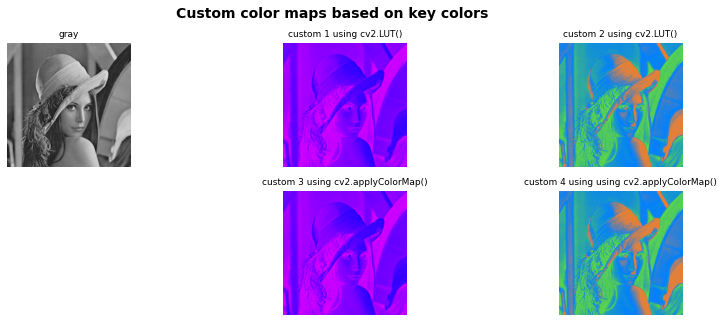

In [99]:
# This dictionary is only for debugging purposes:
dict_color = {0: "blue", 1: "green", 2: "red"}


def build_lut(cmap):
    """Builds look up table based on 'key colors' using np.linspace()"""

    lut = np.empty(shape=(256, 3), dtype=np.uint8)
    # Show for debugging purposes:
    # print("----------")
    # print(cmap)
    # print("-----")

    max = 256
    # build lookup table:
    lastval, lastcol = cmap[0]
    for step, col in cmap[1:]:
        val = int(step * max)
        for i in range(3):
        #     print("{} : np.linspace('{}', '{}', '{}' - '{}' = '{}')".format(dict_color[i], lastcol[i], col[i], val,
        #                                                                     lastval, val - lastval))
            lut[lastval:val, i] = np.linspace(lastcol[i], col[i], val - lastval)

        lastcol = col
        lastval = val

    return lut


def apply_color_map_1(gray, cmap):
    """Applies a custom color map using cv2.LUT()"""

    lut = build_lut(cmap)
    s0, s1 = gray.shape
    out = np.empty(shape=(s0, s1, 3), dtype=np.uint8)

    for i in range(3):
        out[..., i] = cv2.LUT(gray, lut[:, i])
    return out


def apply_color_map_2(gray, cmap):
    """Applies a custom color map using cv2.applyColorMap()"""

    lut = build_lut(cmap)
    lut_reshape = np.reshape(lut, (256, 1, 3))
    im_color = cv2.applyColorMap(gray, lut_reshape)
    return im_color


def show_with_matplotlib(color_img, title, pos):
    """Shows an image using matplotlib capabilities"""

    # Convert BGR image to RGB
    img_RGB = color_img[:, :, ::-1]

    ax = plt.subplot(2, 3, pos)
    plt.imshow(img_RGB)
    plt.title(title,fontsize=9)
    plt.axis('off')


# Read grayscale image:
# gray_img = cv2.imread('shades.png', cv2.IMREAD_GRAYSCALE)

# Create the dimensions of the figure and set title:
plt.figure(figsize=(14, 5))
plt.suptitle("Custom color maps based on key colors", fontsize=14, fontweight='bold')

# Show gray image:
show_with_matplotlib(cv2.cvtColor(gray_img, cv2.COLOR_GRAY2BGR), "gray", 1)

# Apply the custom color map - (b,g,r) values:
custom_1 = apply_color_map_1(gray_img, ((0, (255, 0, 255)), (0.25, (255, 0, 180)), (0.5, (255, 0, 120)),
                                        (0.75, (255, 0, 60)), (1.0, (255, 0, 0))))

custom_2 = apply_color_map_1(gray_img, ((0, (0, 255, 128)), (0.25, (128, 184, 64)), (0.5, (255, 128, 0)),
                                        (0.75, (64, 128, 224)), (1.0, (0, 128, 255))))

custom_3 = apply_color_map_2(gray_img, ((0, (255, 0, 255)), (0.25, (255, 0, 180)), (0.5, (255, 0, 120)),
                                        (0.75, (255, 0, 60)), (1.0, (255, 0, 0))))

custom_4 = apply_color_map_2(gray_img, ((0, (0, 255, 128)), (0.25, (128, 184, 64)), (0.5, (255, 128, 0)),
                                        (0.75, (64, 128, 224)), (1.0, (0, 128, 255))))

# Display all the resulting images:
show_with_matplotlib(custom_1, "custom 1 using cv2.LUT()", 2)
show_with_matplotlib(custom_2, "custom 2 using cv2.LUT()", 3)
show_with_matplotlib(custom_3, "custom 3 using cv2.applyColorMap()", 5)
show_with_matplotlib(custom_4, "custom 4 using using cv2.applyColorMap()", 6)

# Show the Figure:
plt.show()

### **Showing the legend for custom color maps**
___

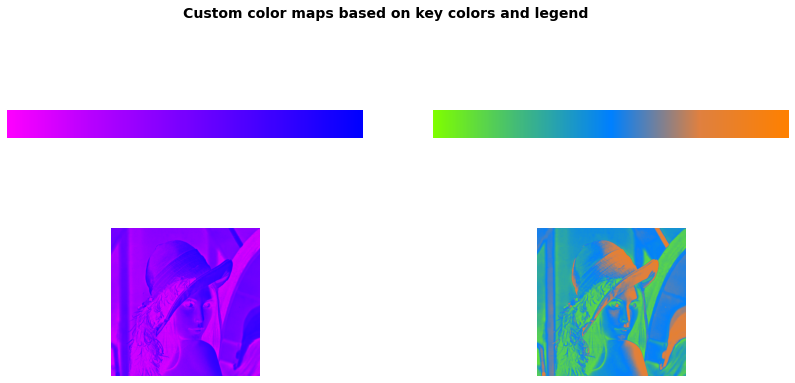

In [102]:
# Create the dimensions of the figure and set title:
def build_lut_image(cmap, height):
    """Builds the legend image"""

    lut = build_lut(cmap)
    image = np.repeat(lut[np.newaxis, ...], height, axis=0)

    return image

def show_with_matplotlib(color_img, title, pos):
    """Shows an image using matplotlib capabilities"""

    # Convert BGR image to RGB
    img_RGB = color_img[:, :, ::-1]

    ax = plt.subplot(2, 2, pos)
    plt.imshow(img_RGB)
    plt.title(title)
    plt.axis('off')

plt.figure(figsize=(14, 6))
plt.suptitle("Custom color maps based on key colors and legend", fontsize=14, fontweight='bold')

# Build the color maps (b,g,r) values:
custom_1 = apply_color_map_1(gray_img, ((0, (255, 0, 255)), (0.25, (255, 0, 180)), (0.5, (255, 0, 120)),
                                        (0.75, (255, 0, 60)), (1.0, (255, 0, 0))))

custom_2 = apply_color_map_2(gray_img, ((0, (0, 255, 128)), (0.25, (128, 184, 64)), (0.5, (255, 128, 0)),
                                        (0.75, (64, 128, 224)), (1.0, (0, 128, 255))))

# Build the legend images:
legend_1 = build_lut_image(((0, (255, 0, 255)), (0.25, (255, 0, 180)), (0.5, (255, 0, 120)),
                            (0.75, (255, 0, 60)), (1.0, (255, 0, 0))), 20)

legend_2 = build_lut_image(((0, (0, 255, 128)), (0.25, (128, 184, 64)), (0.5, (255, 128, 0)),
                            (0.75, (64, 128, 224)), (1.0, (0, 128, 255))), 20)

# Display all the resulting images:
show_with_matplotlib(legend_1, "", 1)
show_with_matplotlib(custom_1, "", 3)
show_with_matplotlib(legend_2, "", 2)
show_with_matplotlib(custom_2, "", 4)